In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [43]:
df1 = pd.read_csv("blinkit_inventory.csv")
df2 = pd.read_csv("blinkit_inventoryNew.csv")

In [44]:
df1

product_id        date  stock_received  damaged_stock
0          153019  17-03-2023               4              2
1          848226  17-03-2023               4              2
2          965755  17-03-2023               1              0
3           39154  17-03-2023               4              0
4           34186  17-03-2023               3              2
...           ...         ...             ...            ...
75167      298985  05-11-2024               3              0
75168      679284  05-11-2024               3              0
75169      240179  05-11-2024               3              0
75170      673058  05-11-2024               3              2
75171      114414  05-11-2024               3              0

[75172 rows x 4 columns]

In [45]:
df2

product_id    date  stock_received  damaged_stock
0          153019  Mar-23               4              1
1          848226  Mar-23               4              1
2          965755  Mar-23               1              0
3           39154  Mar-23               4              0
4           34186  Mar-23               3              1
...           ...     ...             ...            ...
18100      837480  Nov-24               3              0
18101       56589  Nov-24               3              0
18102      679284  Nov-24               3              0
18103      673058  Nov-24               3              0
18104      114414  Nov-24               3              0

[18105 rows x 4 columns]

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75172 entries, 0 to 75171
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      75172 non-null  int64 
 1   date            75172 non-null  object
 2   stock_received  75172 non-null  int64 
 3   damaged_stock   75172 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ MB


In [47]:
df1['date'] = pd.to_datetime(df1['date'], format='%d-%m-%Y').dt.date

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18105 entries, 0 to 18104
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      18105 non-null  int64 
 1   date            18105 non-null  object
 2   stock_received  18105 non-null  int64 
 3   damaged_stock   18105 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 565.9+ KB


In [49]:
df2['date'] = df2['date'].apply(lambda x: datetime.strptime(f"{x}-2025", "%b-%d-%Y").date())

In [50]:
merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df


product_id        date  stock_received  damaged_stock
0          153019  2023-03-17               4              2
1          848226  2023-03-17               4              2
2          965755  2023-03-17               1              0
3           39154  2023-03-17               4              0
4           34186  2023-03-17               3              2
...           ...         ...             ...            ...
93272      837480  2025-11-24               3              0
93273       56589  2025-11-24               3              0
93274      679284  2025-11-24               3              0
93275      673058  2025-11-24               3              0
93276      114414  2025-11-24               3              0

[93277 rows x 4 columns]

In [51]:
merged_df.isna().sum()

product_id        0
date              0
stock_received    0
damaged_stock     0
dtype: int64

In [52]:
print(f"Duplicate rows found before: {merged_df.duplicated().sum()}")
merged_df = merged_df.drop_duplicates()
print(f"Duplicate rows found after: {merged_df.duplicated().sum()}")

Duplicate rows found before: 7359
Duplicate rows found after: 0


In [53]:
merged_df

product_id        date  stock_received  damaged_stock
0          153019  2023-03-17               4              2
1          848226  2023-03-17               4              2
2          965755  2023-03-17               1              0
3           39154  2023-03-17               4              0
4           34186  2023-03-17               3              2
...           ...         ...             ...            ...
93269      425341  2025-11-24               3              0
93270      723678  2025-11-24               3              0
93274      679284  2025-11-24               3              0
93275      673058  2025-11-24               3              0
93276      114414  2025-11-24               3              0

[85918 rows x 4 columns]

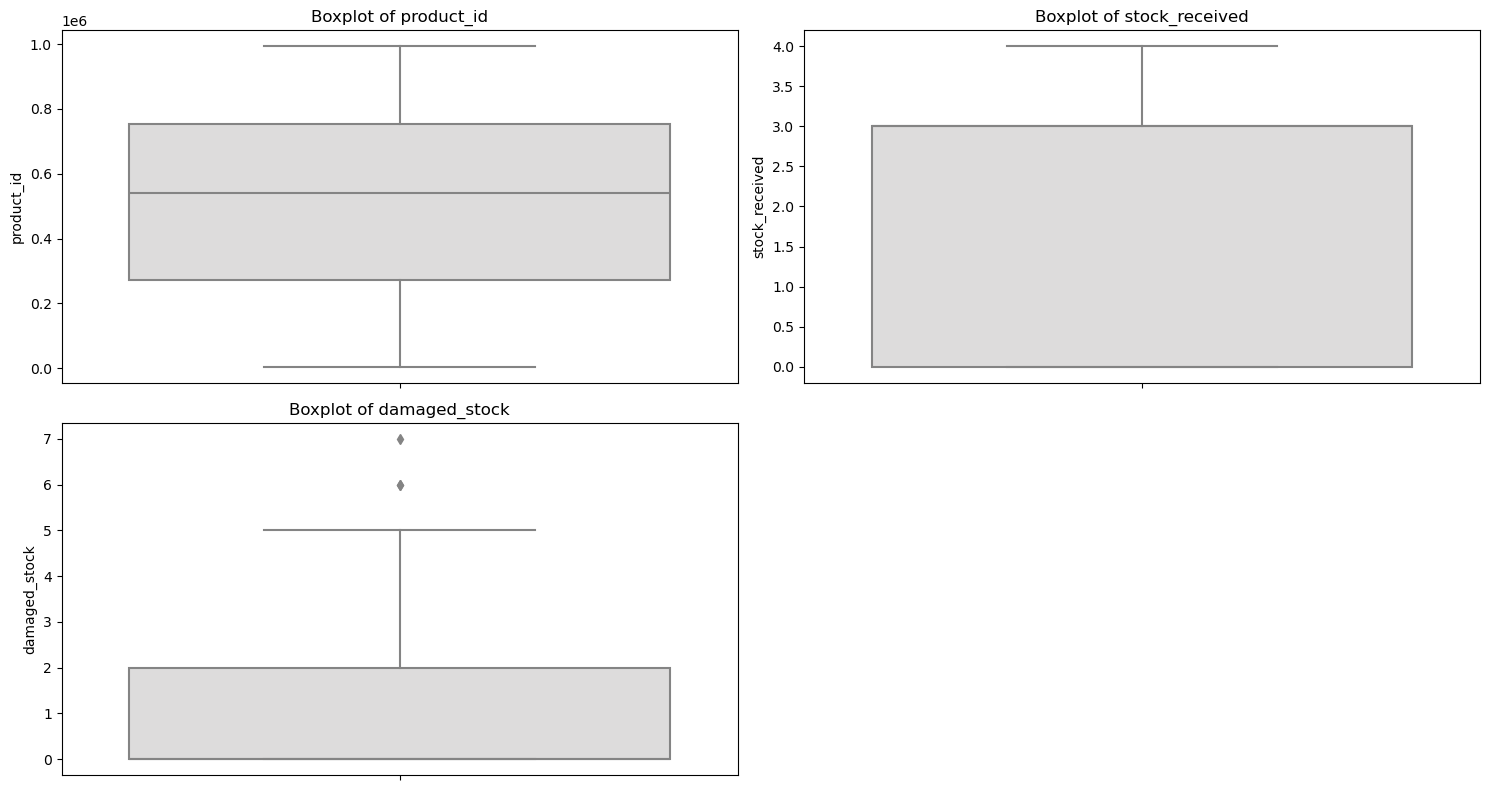

In [54]:
numerical_cols = merged_df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols) // 2) + 1, i)
    sns.boxplot(y=merged_df[col], palette="coolwarm")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


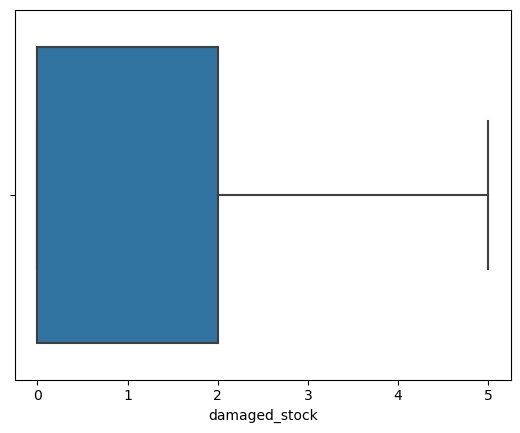

In [55]:
Q1 = merged_df['damaged_stock'].quantile(0.25)
Q3 = merged_df['damaged_stock'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

merged_df = merged_df[(merged_df['damaged_stock'] >= lower_bound) & (merged_df['damaged_stock'] <= upper_bound)]

sns.boxplot(x=merged_df['damaged_stock']);

In [56]:
merged_df.to_csv("cleaned_blinkit_inventory.csv", index=False)
